In [3]:
import torch

USE_CUDA = torch.cuda.is_available()
print(USE_CUDA)

device = torch.device('cuda:0' if USE_CUDA else 'cpu')
print('학습을 진행하는 기기:',device)
print('cuda index:', torch.cuda.current_device())
print('gpu 개수:', torch.cuda.device_count())
print('graphic name:', torch.cuda.get_device_name())

cuda = torch.device('cuda')
print(cuda)

True
학습을 진행하는 기기: cuda:0
cuda index: 0
gpu 개수: 1
graphic name: GeForce 940MX
cuda


In [5]:
import fastbook
fastbook.setup_book()

In [6]:
import fastai
fastai.__version__
from fastai.vision.all import *

In [7]:
from fastbook import *
from fastai.vision.widgets import *

In [8]:
from IPython.display import display
from IPython.display import Image
from ipywidgets import widgets

In [9]:
from PIL import Image

In [10]:
# 데이터셋 로드 
path=Path('./dataset')
image_files = get_image_files(path)
image_files

(#3538) [Path('dataset/cactus/  (1).jpg'),Path('dataset/cactus/  (10).jpg'),Path('dataset/cactus/  (100).jpg'),Path('dataset/cactus/  (101).jpg'),Path('dataset/cactus/  (102).jpg'),Path('dataset/cactus/  (103).jpg'),Path('dataset/cactus/  (104).jpg'),Path('dataset/cactus/  (105).jpg'),Path('dataset/cactus/  (106).jpg'),Path('dataset/cactus/  (107).jpg')...]

In [11]:
# confusion matrix for your dataset 
# a screenshot of the output printed of the 10 images with the highest loss in your dataset 
# For each of the 10 images, give an explanation of why this image was included in the top loss plot, 
# and the resulting action you took. Did you remove the image, why? And if not, why did you include it? 

In [12]:
# 모델 / 모델 학습 / 학습 결과 
plants = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

In [13]:
dls = plants.dataloaders(path, num_workers=0)

dls.valid.show_batch(max_n=4, nrows=1)

### Resize

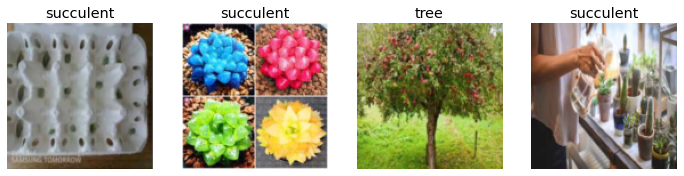

In [14]:
plants = plants.new(item_tfms=Resize(128, ResizeMethod.Squish))
dls = plants.dataloaders(path, num_workers=0)
dls.valid.show_batch(max_n=4, nrows=1)

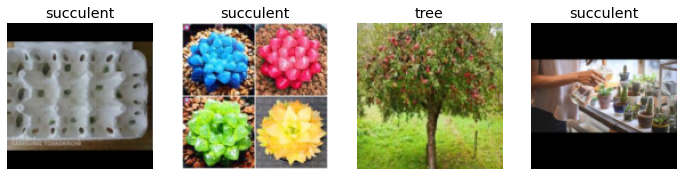

In [15]:
plants = plants.new(item_tfms=Resize(128, ResizeMethod.Pad, pad_mode='zeros'))
dls = plants.dataloaders(path, num_workers=0)
dls.valid.show_batch(max_n=4, nrows=1)

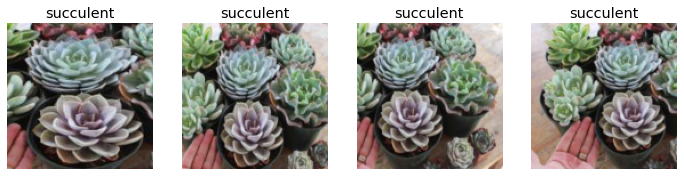

In [16]:
plants = plants.new(item_tfms=RandomResizedCrop(128, min_scale=0.3))
dls = plants.dataloaders(path, num_workers=0)
dls.train.show_batch(max_n=4, nrows=1, unique=True)

In [17]:
# plants = plants.new(item_tfms=Resize(128), batch_tfms=aug_transforms(mult=2))
# dls = plants.dataloaders(path, num_workers=0)
# dls.train.show_batch(max_n=8, nrows=2, unique=True)

### Learn

In [18]:
#torch.cuda.empty_cache()

In [19]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)  

epoch,train_loss,valid_loss,error_rate,time
0,1.457597,1.070994,0.345120,00:35


epoch,train_loss,valid_loss,error_rate,time
0,1.111095,0.904028,0.321075,00:41
1,0.971454,0.856116,0.298444,00:42
2,0.825609,0.790097,0.301273,00:43
3,0.710200,0.780821,0.299859,00:44


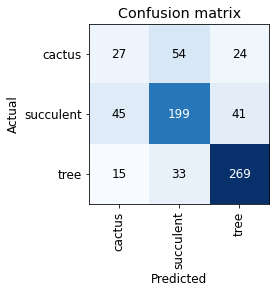

In [20]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

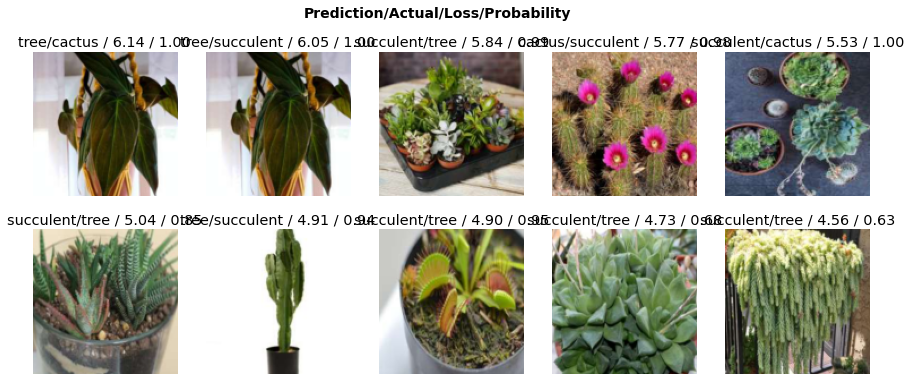

In [21]:
interp.plot_top_losses(10, nrows=2)

In [22]:
cleaner = ImageClassifierCleaner(learn)
cleaner

### Export

In [23]:
learn.export()

In [24]:
path=Path()
path.ls(file_exts='.pkl')

(#1) [Path('export.pkl')]

In [31]:
learn_inf = load_learner(path/'export.pkl')

In [ ]:
#learn_inf.predict('/dataset/cactus/ (1).jpg')

In [81]:
learn_inf.dls.vocab

['cactus', 'succulent', 'tree']

In [82]:
#btn_upload = widgets.FileUpload()
#btn_upload

FileUpload(value={}, description='Upload')

In [83]:
#hide Now we can grab the image
# For the book, we can't actually click an upload button, so we fake it

#upload_filename = list(args['new'].keys())[0]
#btn_upload = SimpleNamespace(data = ['upload_filename'])

In [85]:
#img = PILImage.create(btn_upload.data[-1])

In [86]:
# #hide_output / We can use an Output widget to display it
# out_pl = widgets.Output()
# out_pl.clear_output()
# with out_pl: display(img.to_thumb(128,128))
# out_pl

In [87]:
# pred,pred_idx,probs = learn_inf.predict(img)

In [88]:
#hide_output / and use a Label to display them:
#lbl_pred = widgets.Label()
#lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
#lbl_pred

In [96]:
#hide_output / We'll need a button to do the classification. It looks exactly like the upload button:
#btn_run = widgets.Button(description='Classify')
#btn_run

In [93]:
# We'll also need a click event handler; that is, a function that will be called when it's pressed. 
# We can just copy over the lines of code from above
def on_click_classify(change):
    img = PILImage.create(btn_upload.data[-1])
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(128,128))
    pred,pred_idx,probs = learn_inf.predict(img)
    lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'

btn_run.on_click(on_click_classify)

In [97]:
#hide
#Putting back btn_upload to a widget for next cell
btn_upload = widgets.FileUpload()

In [98]:
#hide_output
VBox([widgets.Label('Select your bear!'), 
      btn_upload, btn_run, out_pl, lbl_pred])

In [ ]:
#hide
# !pip install voila
# !jupyter serverextension enable --sys-prefix voila 

In [ ]:
# !jupyter nbextension list

In [ ]:
# ! jupyter serverextension list

In [ ]:
#voila plants_classifier.ipynb

In [ ]:
# 깃허브, binder

In [7]:
# from IPython.display import display
# from ipywidgets import widgets

# def upload_file(args):
#     upload_filename = list(args['new'].keys())[0]
#     uploaded_file = args['new'][upload_filename]
#     content = uploaded_file.get('content')
#     print(uploaded_file)
#     print(uploaded_file.get('metadata').get('name'))
    
# w = widgets.FileUpload(
#     accept='image/png, image/jpeg',
#     multiple=False 
# )

# display(w)
# w.observe(upload_file, names=['value'])

# #widgets.Image(value=content)

FileUpload(value={}, accept='image/png, image/jpeg', description='Upload')

In [ ]:
# 업로드된 이미지 모델에 사용

# 결과 출력 ( )

In [ ]:
# Voila, Binder 웹 배포 
# https://mybinder.org/](https://mybinder.org/)

